# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(784,)

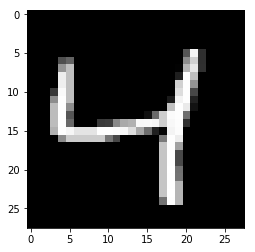

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size))
targets_ = tf.placeholder(tf.float32, shape=(None, image_size))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [13]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6954
Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6892
Epoch: 1/20... Training loss: 0.6861
Epoch: 1/20... Training loss: 0.6824
Epoch: 1/20... Training loss: 0.6779
Epoch: 1/20... Training loss: 0.6732
Epoch: 1/20... Training loss: 0.6666
Epoch: 1/20... Training loss: 0.6592
Epoch: 1/20... Training loss: 0.6500
Epoch: 1/20... Training loss: 0.6401
Epoch: 1/20... Training loss: 0.6292
Epoch: 1/20... Training loss: 0.6175
Epoch: 1/20... Training loss: 0.6034
Epoch: 1/20... Training loss: 0.5883
Epoch: 1/20... Training loss: 0.5714
Epoch: 1/20... Training loss: 0.5556
Epoch: 1/20... Training loss: 0.5357
Epoch: 1/20... Training loss: 0.5188
Epoch: 1/20... Training loss: 0.4986
Epoch: 1/20... Training loss: 0.4838
Epoch: 1/20... Training loss: 0.4679
Epoch: 1/20... Training loss: 0.4504
Epoch: 1/20... Training loss: 0.4311
Epoch: 1/20... Training loss: 0.4195
Epoch: 1/20... Training loss: 0.3998
Epoch: 1/20... Training loss: 0.3843
E

Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1787
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1807
E

Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1545
E

Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1293
E

Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1238
E

Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1161
E

Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1065
E

Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1003
E

Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0993
E

Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0986
E

Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0964
E

Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0905
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0907
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0884
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0985
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

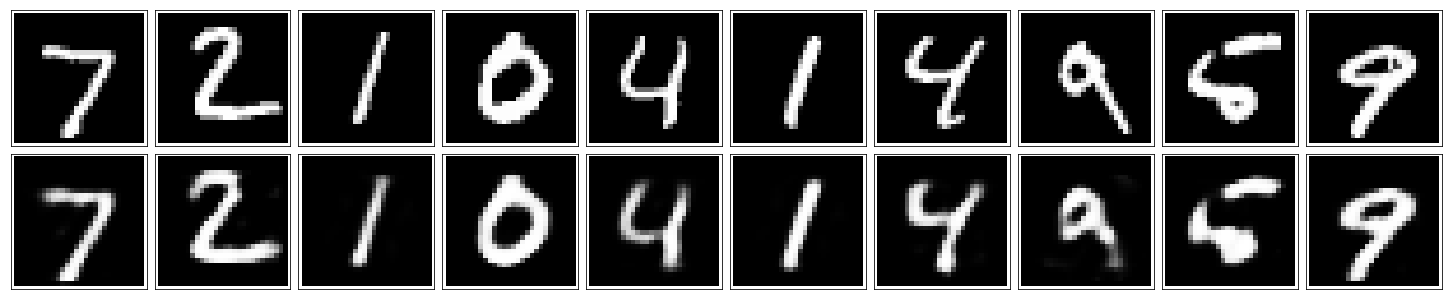

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [16]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.